In [20]:
from psutil import virtual_memory

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')  


Thu Apr 29 18:02:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    32W / 250W |  15563MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
#@title Execution params

#@markdown Paths  params
report_name = "dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001" #@param {type: "string"}
dataset_name = 'SeismicDataSet'  #@param {type: "string"}
#@markdown Image input params
image_width_height = 256  #@param {type: "slider", min: 4, max: 2096, step: 4}
image_width_width = 256  #@param {type: "slider", min: 4, max: 2096, step: 4}

#@markdown Neural network params
n_epochs = 500  #@param {type: "slider", min: 1, max: 10000}
n_batch = 4  #@param {type: "slider", min: 1, max: 32}
learning_rate = 0.001 #@param {type: "slider", min: 0, max: 1, step: 0.00001}
dropout=0.1  #@param {type: "slider", min: 0, max: 1, step: 0.01}
model_fit_verbose=0 #@param {type: "slider", min: 0, max: 2, step: 1}
jaccard_loss_percent =25 #@param {type: "slider", min: 0, max: 100, step: 1}
jaccard_loss_percent = float(jaccard_loss_percent) / 100.0

#@markdown Training EarlyStopping params
early_stopping_patience=15 #@param {type: "slider", min: 0, max: 500, step:1}
early_stopping_verbose=0 #@param {type: "slider", min: 0, max: 3}

#@markdown Training ReduceLROnPlateau params
reduce_lr_on_plateau_factor=0.9 #@param {type: "slider", min:0, max: 1, step:0.01}
reduce_lr_on_plateau_patience=25 #@param {type: "slider", min:2, max: 100}
reduce_lr_on_plateau_factor_min_lr_exp=4 #@param {type: "slider", min:0, max: 10}
reduce_lr_on_plateau_verbose=1 #@param {type: "slider", min: 0, max: 3}

#@markdown Training ModelCheckpoint params
model_checkpoint_verbose=0 #@param {type: "slider", min: 0, max: 3}
#@markdown ---

reduce_lr_on_plateau_min_lr = 1 / pow(10, reduce_lr_on_plateau_factor_min_lr_exp)

config = {}

# Neural network params
config['n_batch '] = n_batch 
config['n_epochs'] = n_epochs
config['learning_rate'] = learning_rate
config['jaccard_loss_percent'] = jaccard_loss_percent
config['crossentropy_loss_porcent'] = (1.0 - jaccard_loss_percent)
config['dropout'] = dropout

# Training EarlyStopping params
config['early_stopping_patience'] = early_stopping_patience
config['reduce_lr_on_plateau_factor'] = early_stopping_verbose

# Training ReduceLROnPlateau params
config['reduce_lr_on_plateau_factor'] = reduce_lr_on_plateau_factor
config['reduce_lr_on_plateau_patience'] = reduce_lr_on_plateau_patience
config['reduce_lr_on_plateau_verbose'] = reduce_lr_on_plateau_verbose
config['reduce_lr_on_plateau_min_lr'] = reduce_lr_on_plateau_min_lr

# Training ModelCheckpoint params
config['model_checkpoint_verbose'] = model_checkpoint_verbose

print("Configs:")
for key in config.keys():  
  print(f"   {key} : {config[key]}") 


Configs:
   n_batch  : 4
   n_epochs : 500
   learning_rate : 0.001
   jaccard_loss_percent : 0.25
   crossentropy_loss_porcent : 0.75
   dropout : 0.1
   early_stopping_patience : 15
   reduce_lr_on_plateau_factor : 0.9
   reduce_lr_on_plateau_patience : 25
   reduce_lr_on_plateau_verbose : 1
   reduce_lr_on_plateau_min_lr : 0.0001
   model_checkpoint_verbose : 0


In [22]:
from google.colab import drive
import sys
drive.mount('/content/drive')
google_drive_mount = '/content/drive/MyDrive/'

# sys.path.append('/content/drive/MyDrive/Trabalho/neural_network')
# sys.path.append('/content/drive/MyDrive/Trabalho/neural_network/models')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**<h1>FUNÇÕES DE CARREGAMENTO DE DADO</h1>**

In [23]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/data.py').read_text()))

**<h1>MODELS</h1>**

In [24]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/models/dnfs.py').read_text()))
exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/models/stnet.py').read_text()))
exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/models/unet.py').read_text()))


**<h1>METRICS</h1>**

In [25]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/metrics.py').read_text()))

**<h1>LOSSES</h1>**

In [26]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/losses.py').read_text()))

**<h1>EXTRACT_DATA</h1>**

In [27]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/data_extract_env.py').read_text()))

dataset_dir, path_train, path_test, path_valid, output_root_dir, output_images_root_dir, output_hdf5_models_dir = extract_data(google_drive_mount=google_drive_mount, report_name=report_name, dataset_name=dataset_name)

print("dataset_dir ", dataset_dir)
print("path_train  ", path_train)
print("path_test   ", path_test)
print("path_valid  ", path_valid)
print("output_root_dir", output_root_dir)
print("output_images_root_dir", output_images_root_dir)
print("output_hdf5_models_dir", output_hdf5_models_dir)

Extraindo dados do dataset /content/drive/MyDrive/dataset//SeismicDataSet.zip...
Arquivos em /dataset//train/: 386
Arquivos em /dataset//test/: 101
Arquivos em /dataset//val/: 98
dataset_dir  /dataset/
path_train   /dataset//train/
path_test    /dataset//test/
path_valid   /dataset//val/
output_root_dir /content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001/
output_images_root_dir //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//images/
output_hdf5_models_dir //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/


**<h1>Definição dos modelos para treinamento</h1>**

In [28]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/models_definition.py').read_text()))

**<h3>CARREGANDO DADOS DE TREINAMENTO</h3>**

In [29]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/load_training_data.py').read_text()))


Loading train images: begin
Carregando imagens do diretorio /dataset//train//images/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Images count:  192
Masks count:  192
Done!
Loading train images: end
****************************************
Loading validation images: begin
Carregando imagens do diretorio /dataset//val//images/



Images count:  48
Masks count:  48
Done!
Loading validation images: end


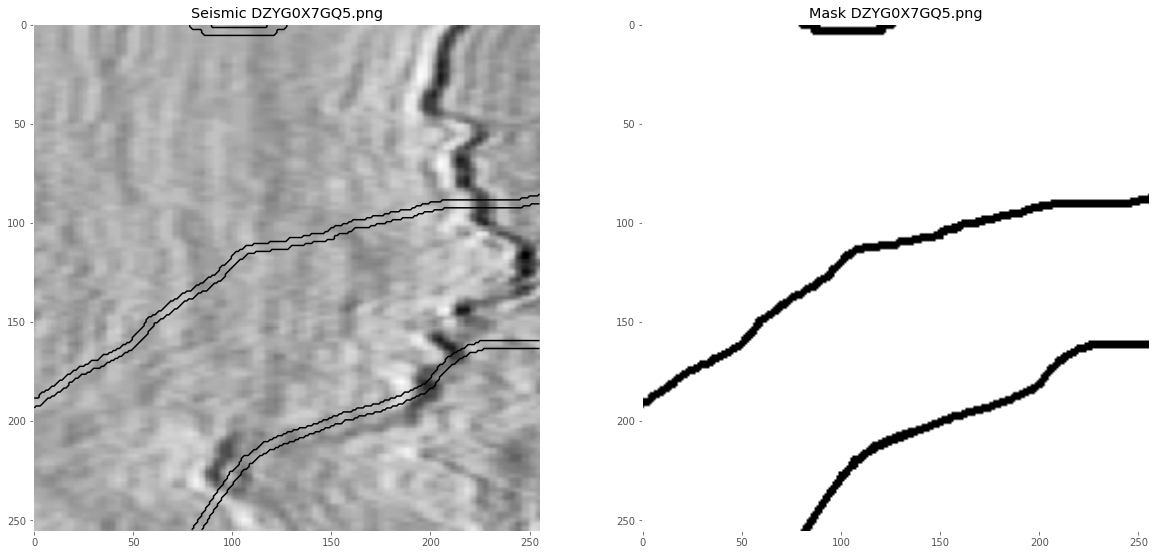

In [30]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/show_mask_and_seismic_sample.py').read_text()))


 
 **<h3>COMPILA OS MODELOS</h3>**

In [31]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/compile_models.py').read_text()))

----------------------------------------
Model summary:  DNFS_4
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 4 40          img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 4 16          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 4 0           batch_normalization[0][0]        
______________________________

 **<h3>TREINAMENTO DOS MODELOS</h3>**

In [32]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/model_train.py').read_text()))

csv log file: /content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001/log.csv
log file    : /content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001/log.txt

Modelos para treinamento:
DNFS_4
DNFS_8
DNFS_16
DNFS_32
DNFS_64
StNet
Unet

----------------------------------------
Inicio do treinamento do modelo DNFS_4 em 2021-04-29 18:02:44.605727
Epoch 00376: early stopping
Treinamento do modelo DNFS_4 finalizado em 2021-04-29 18:07:09.750853
Tempo de treinamento do modelo DNFS_4:  0:04:25.144908
----------------------------------------
Inicio do treinamento do modelo DNFS_8 em 2021-04-29 18:07:09.755644
Epoch 00401: early stopping
Treinamento do modelo DNFS_8 finalizado em 2021-04-29 18:13:11.649568
Tempo de treinamento do modelo DNFS_8:  0:06:01.893773
----------------------------------------
Inicio do treinamento do modelo DNFS_16 em 2021-04-29 18:13:11.652577
Epoch 00073: early stopping
Treinamento do modelo 

 **<h3>GRAFICO DA CURVA DE APRENDIZADO</h3>**

----------------------------------------
Plot de resultados do modelo DNFS_4


<Figure size 1440x864 with 0 Axes>

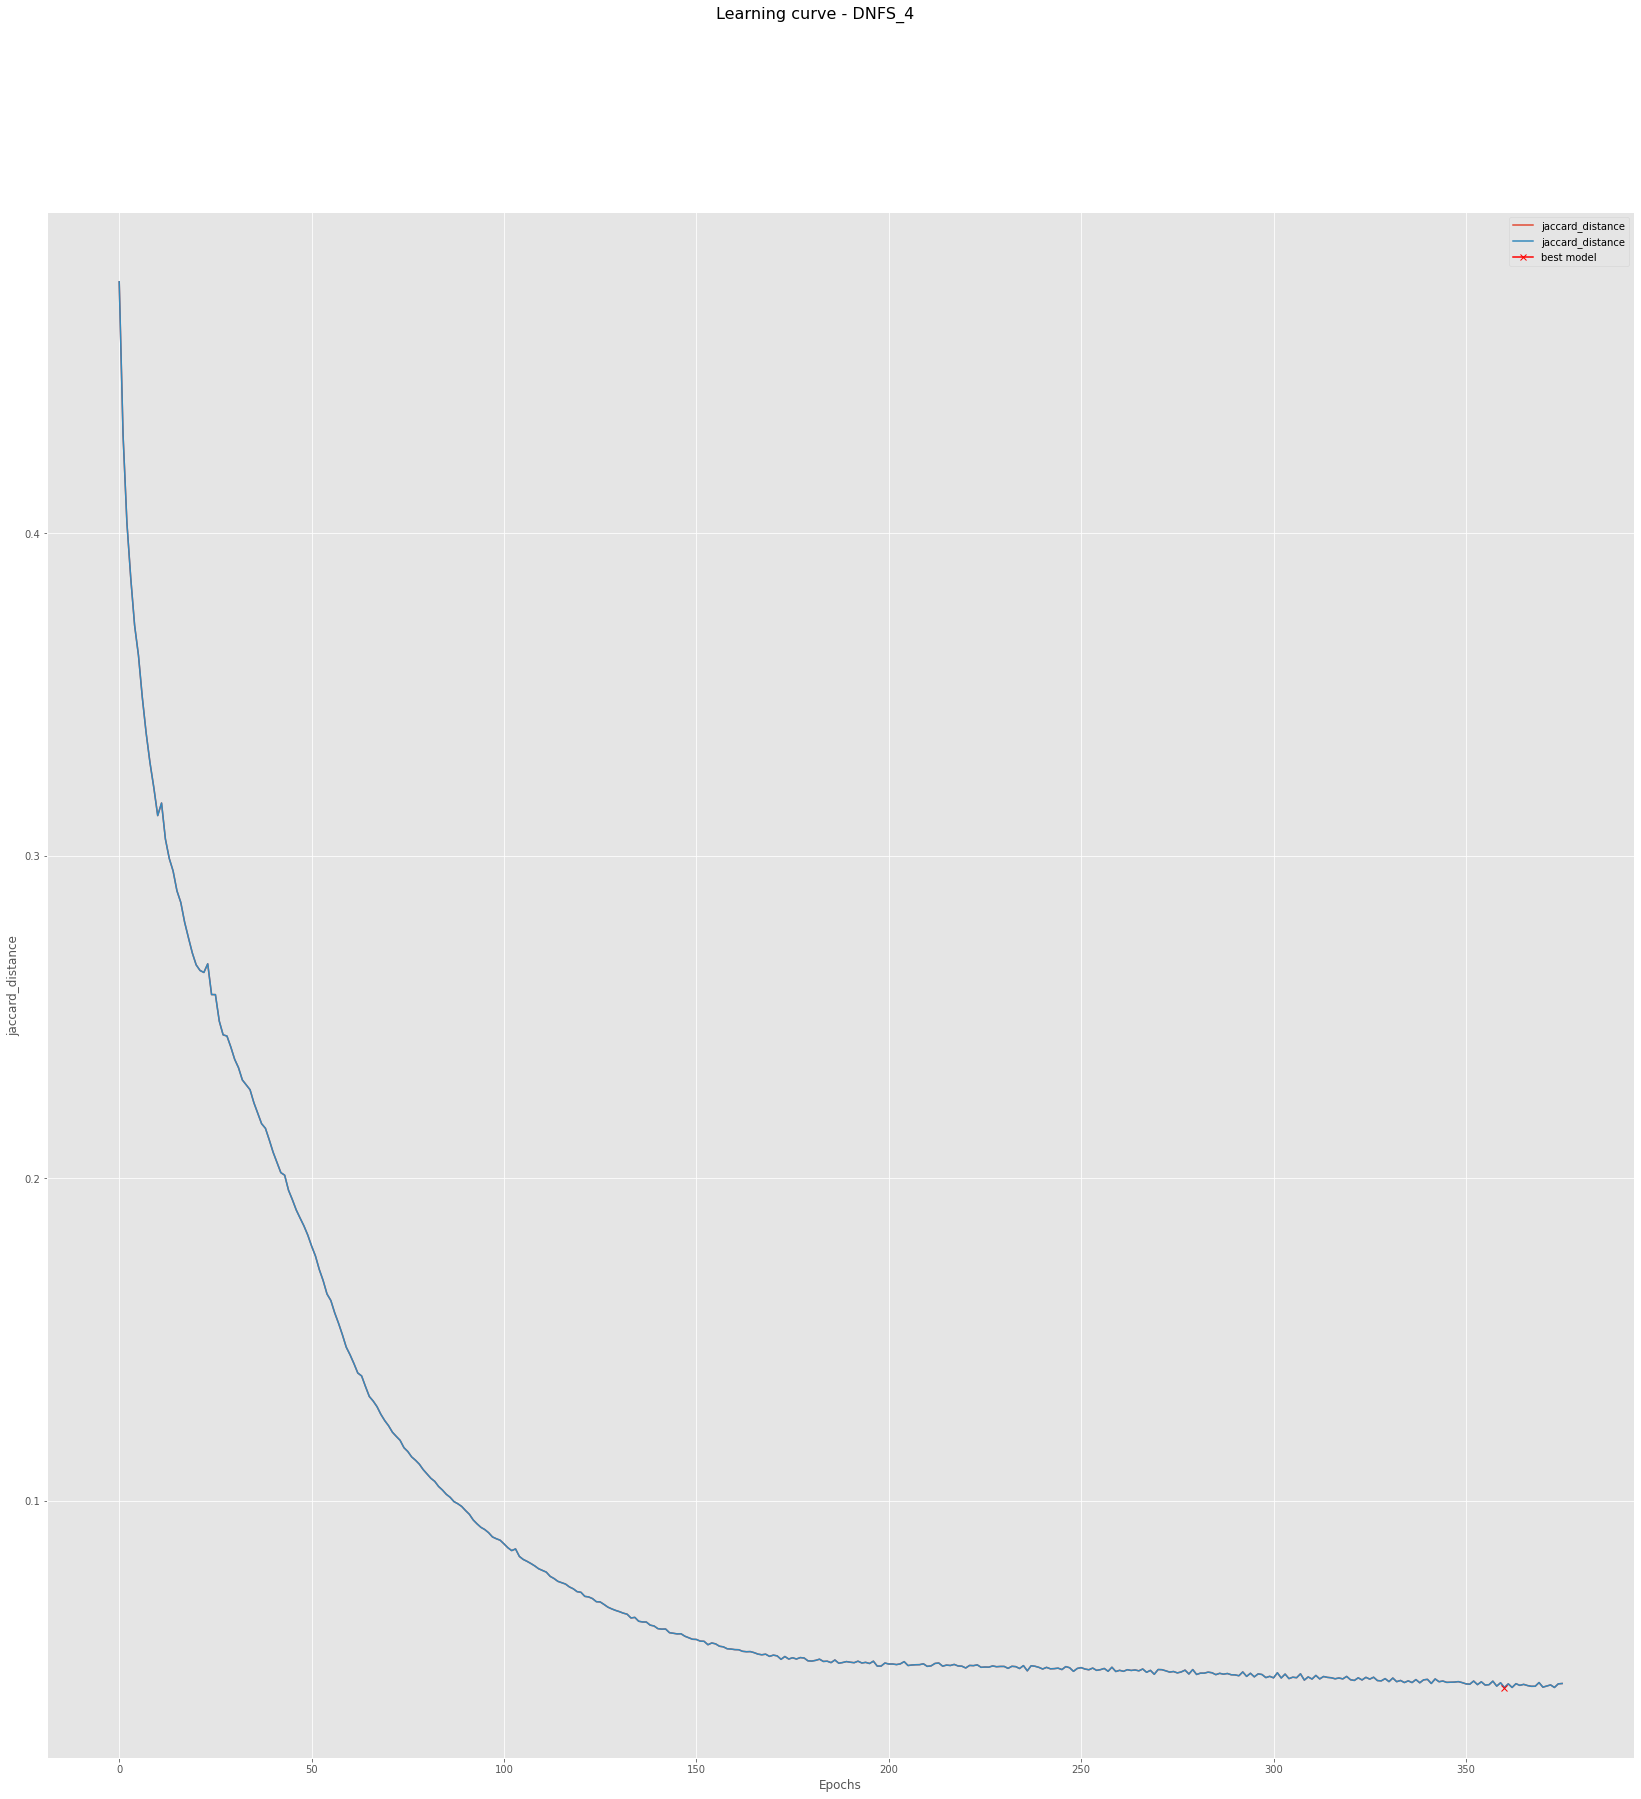

----------------------------------------
Plot de resultados do modelo DNFS_8


<Figure size 1440x864 with 0 Axes>

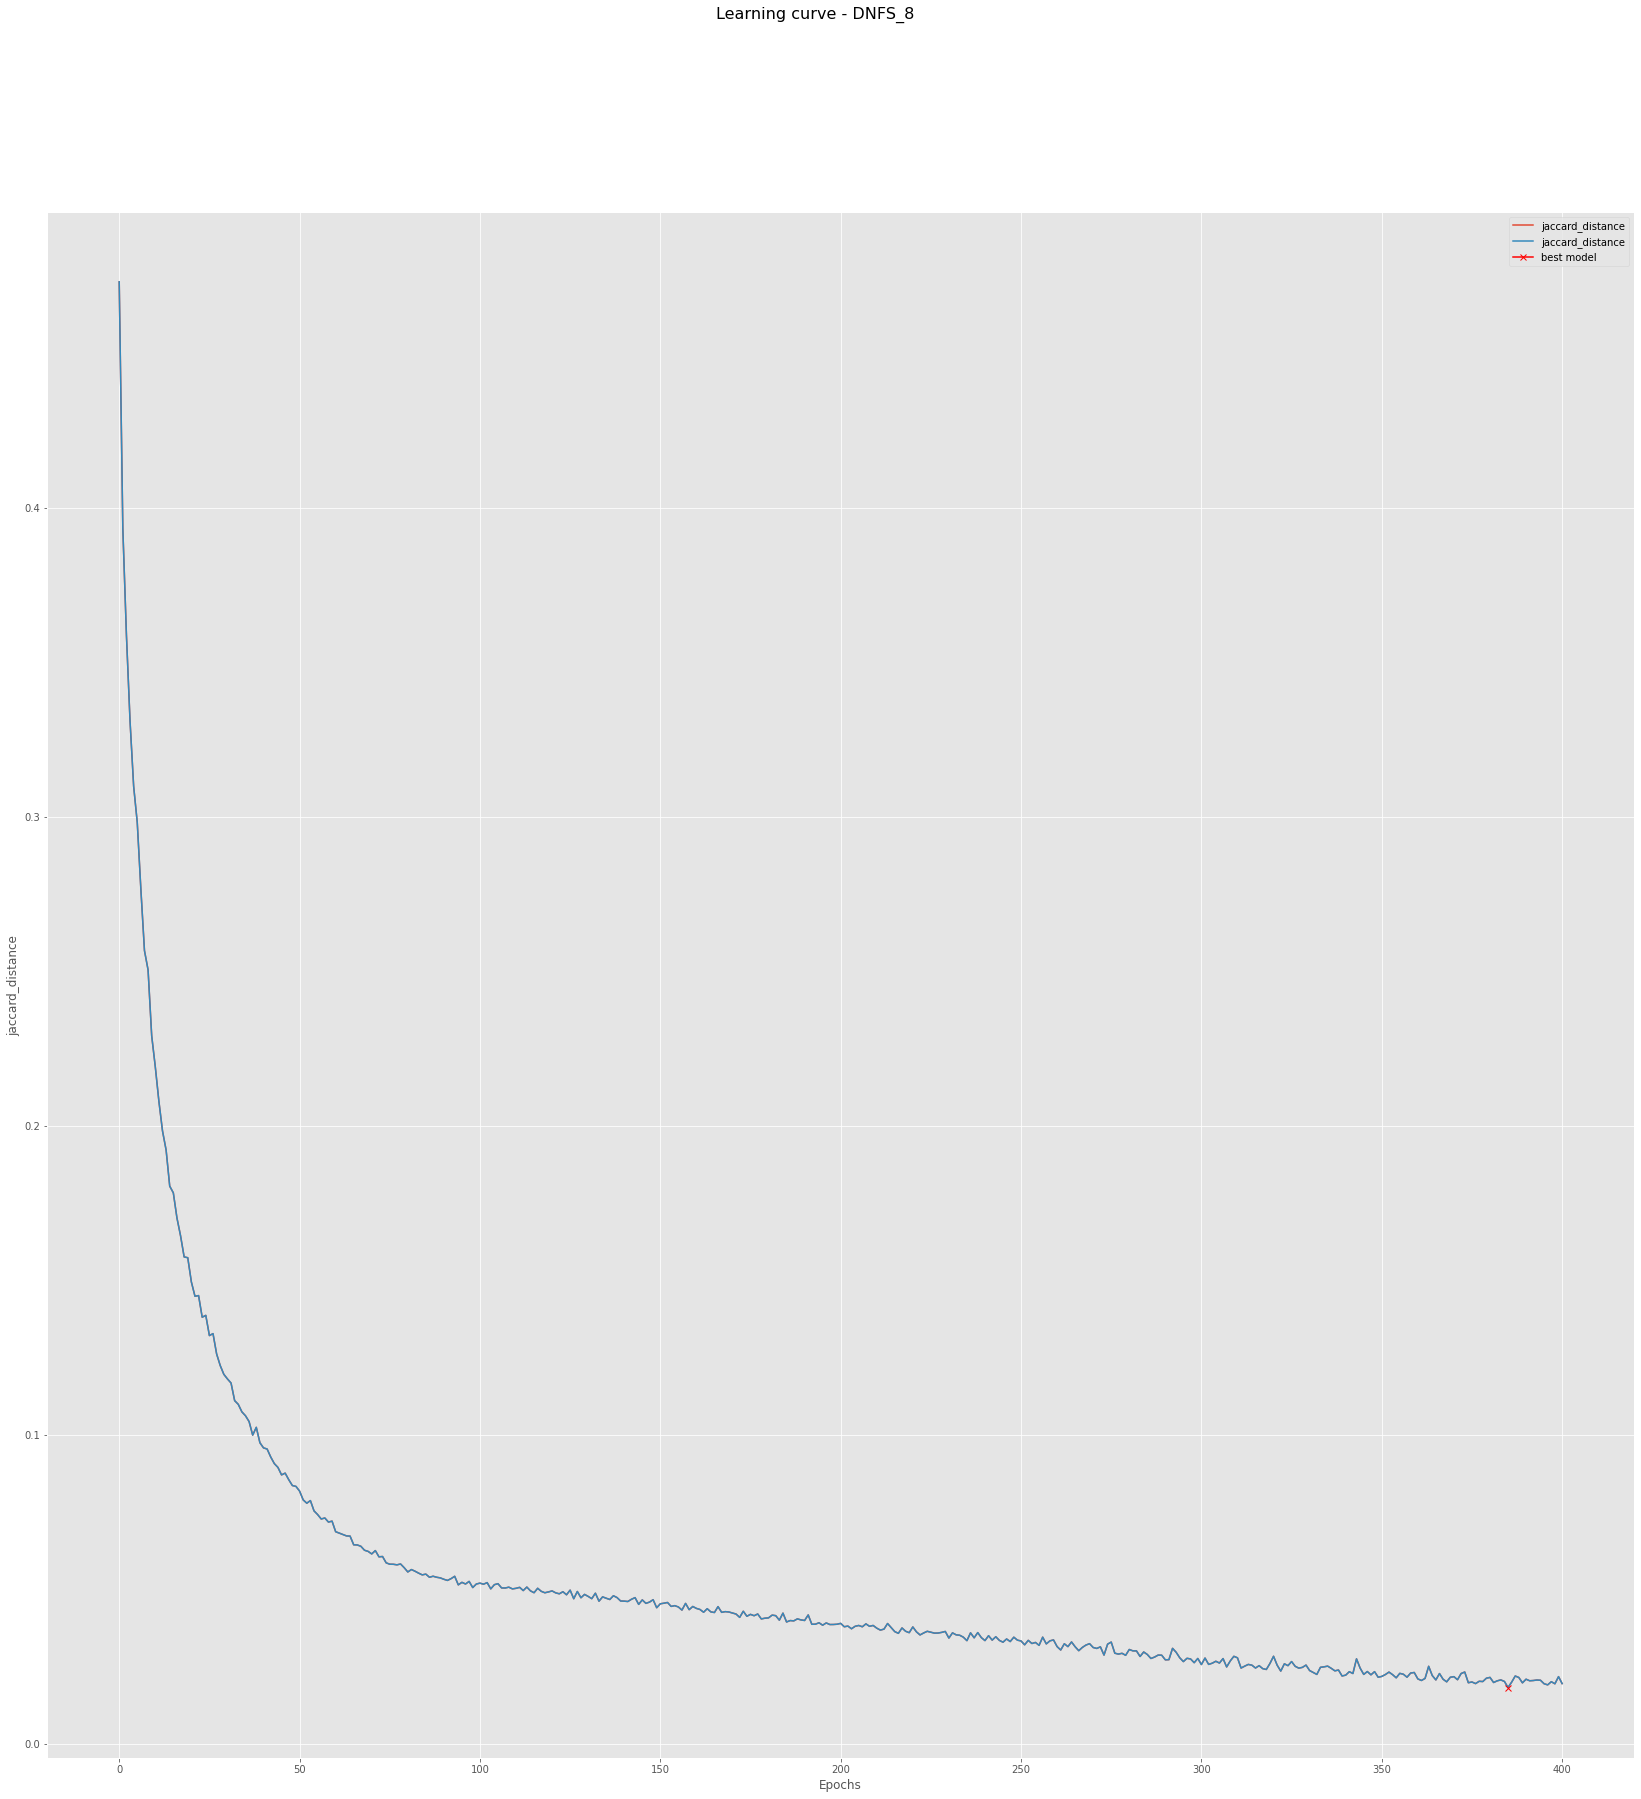

----------------------------------------
Plot de resultados do modelo DNFS_16


<Figure size 1440x864 with 0 Axes>

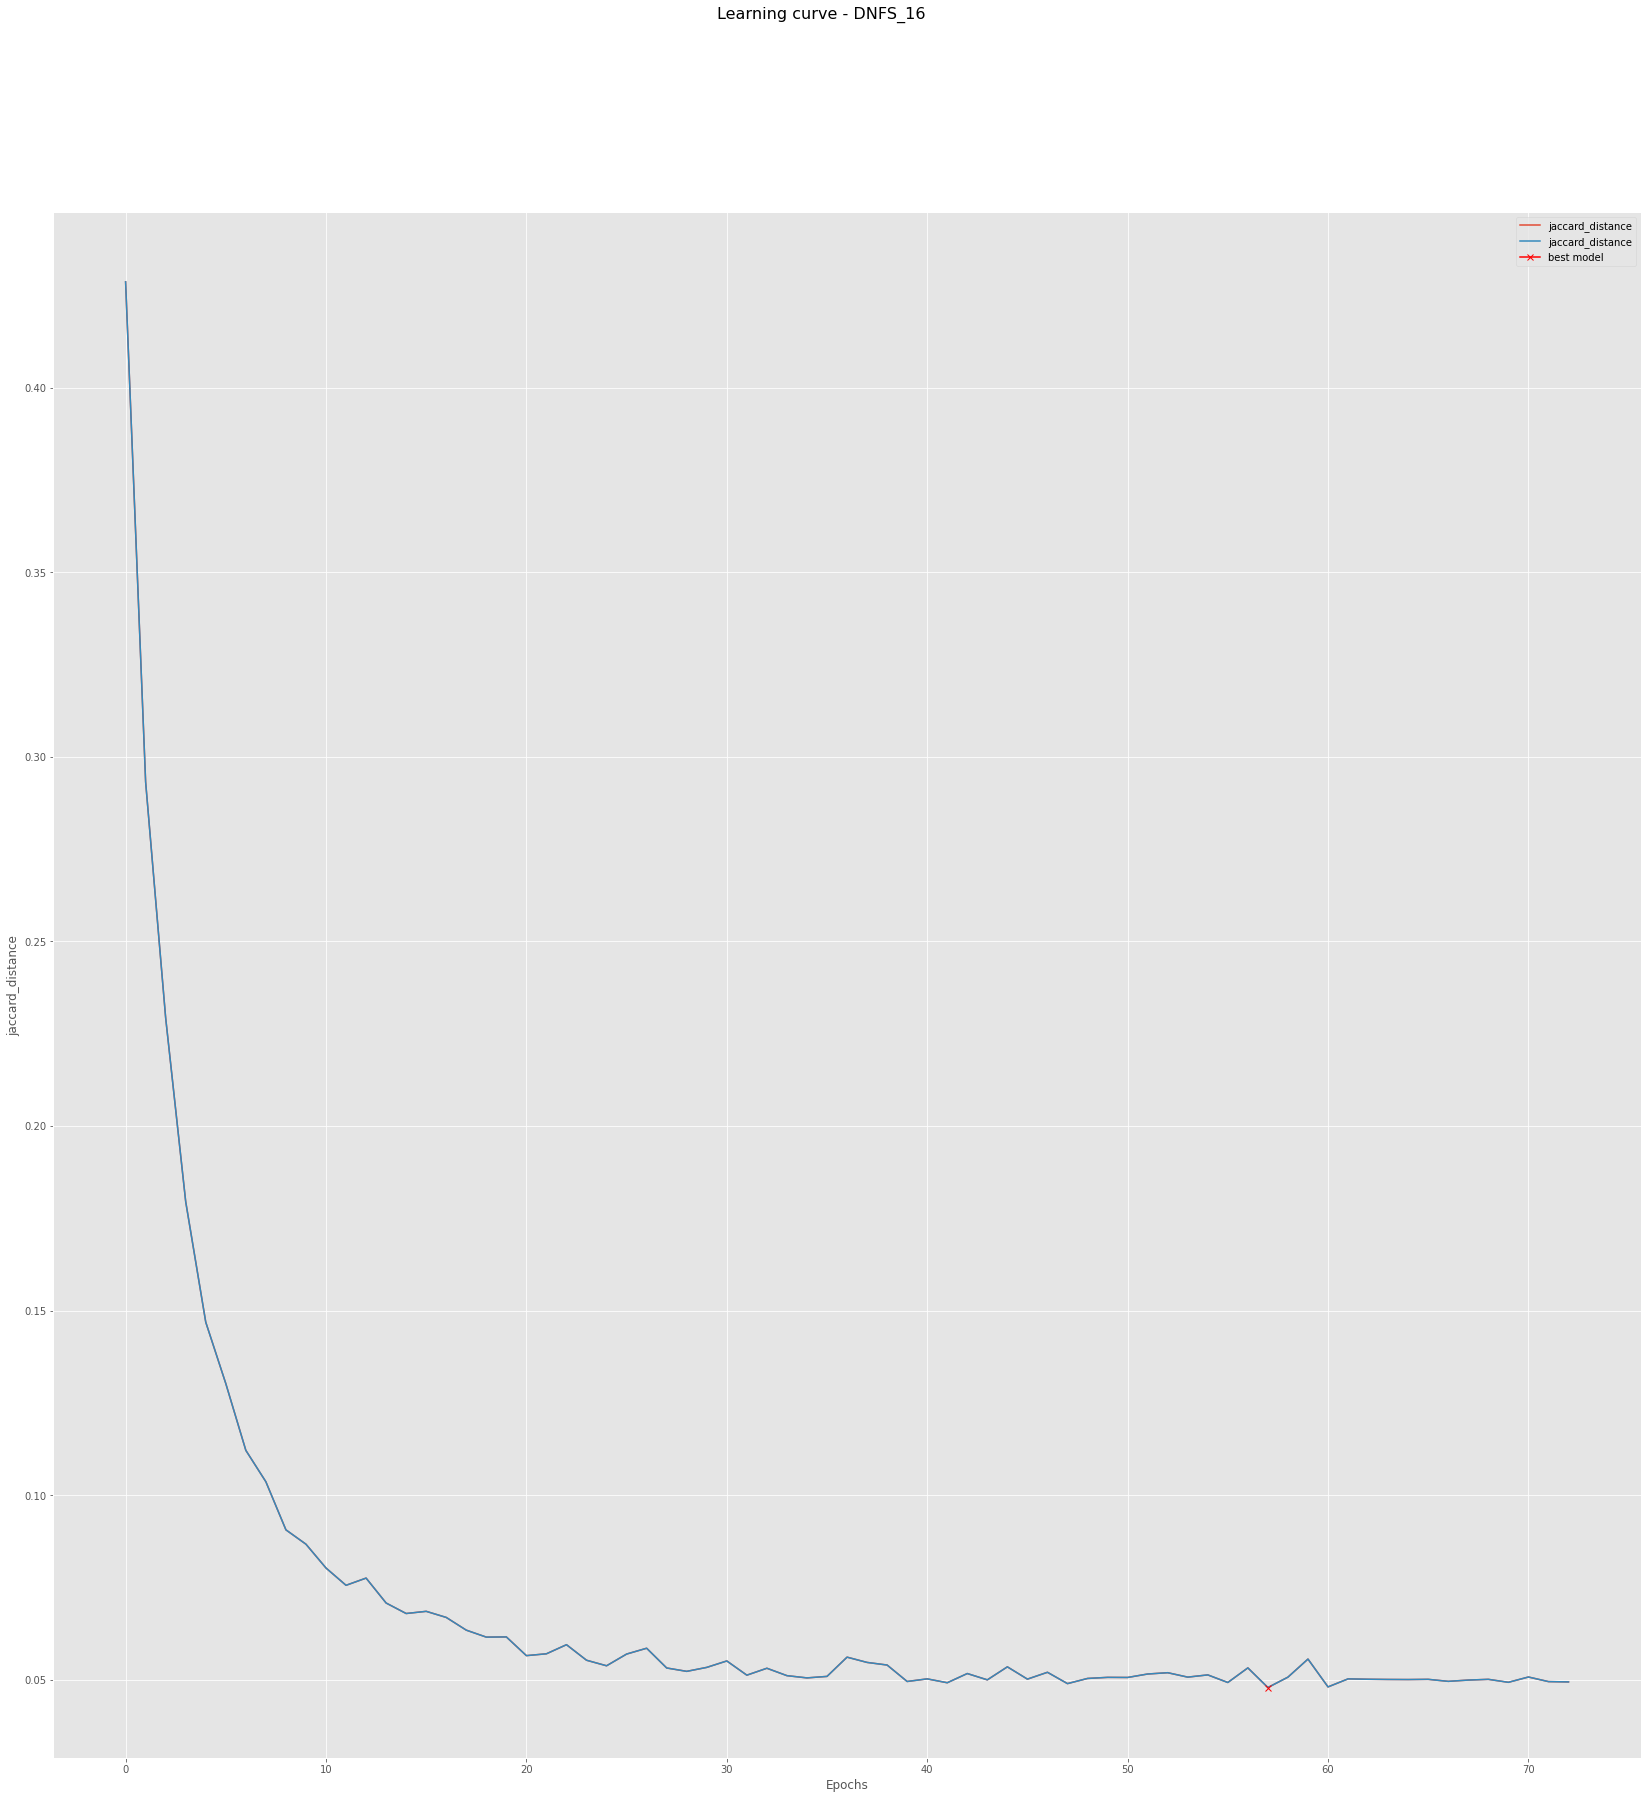

----------------------------------------
Plot de resultados do modelo DNFS_32


<Figure size 1440x864 with 0 Axes>

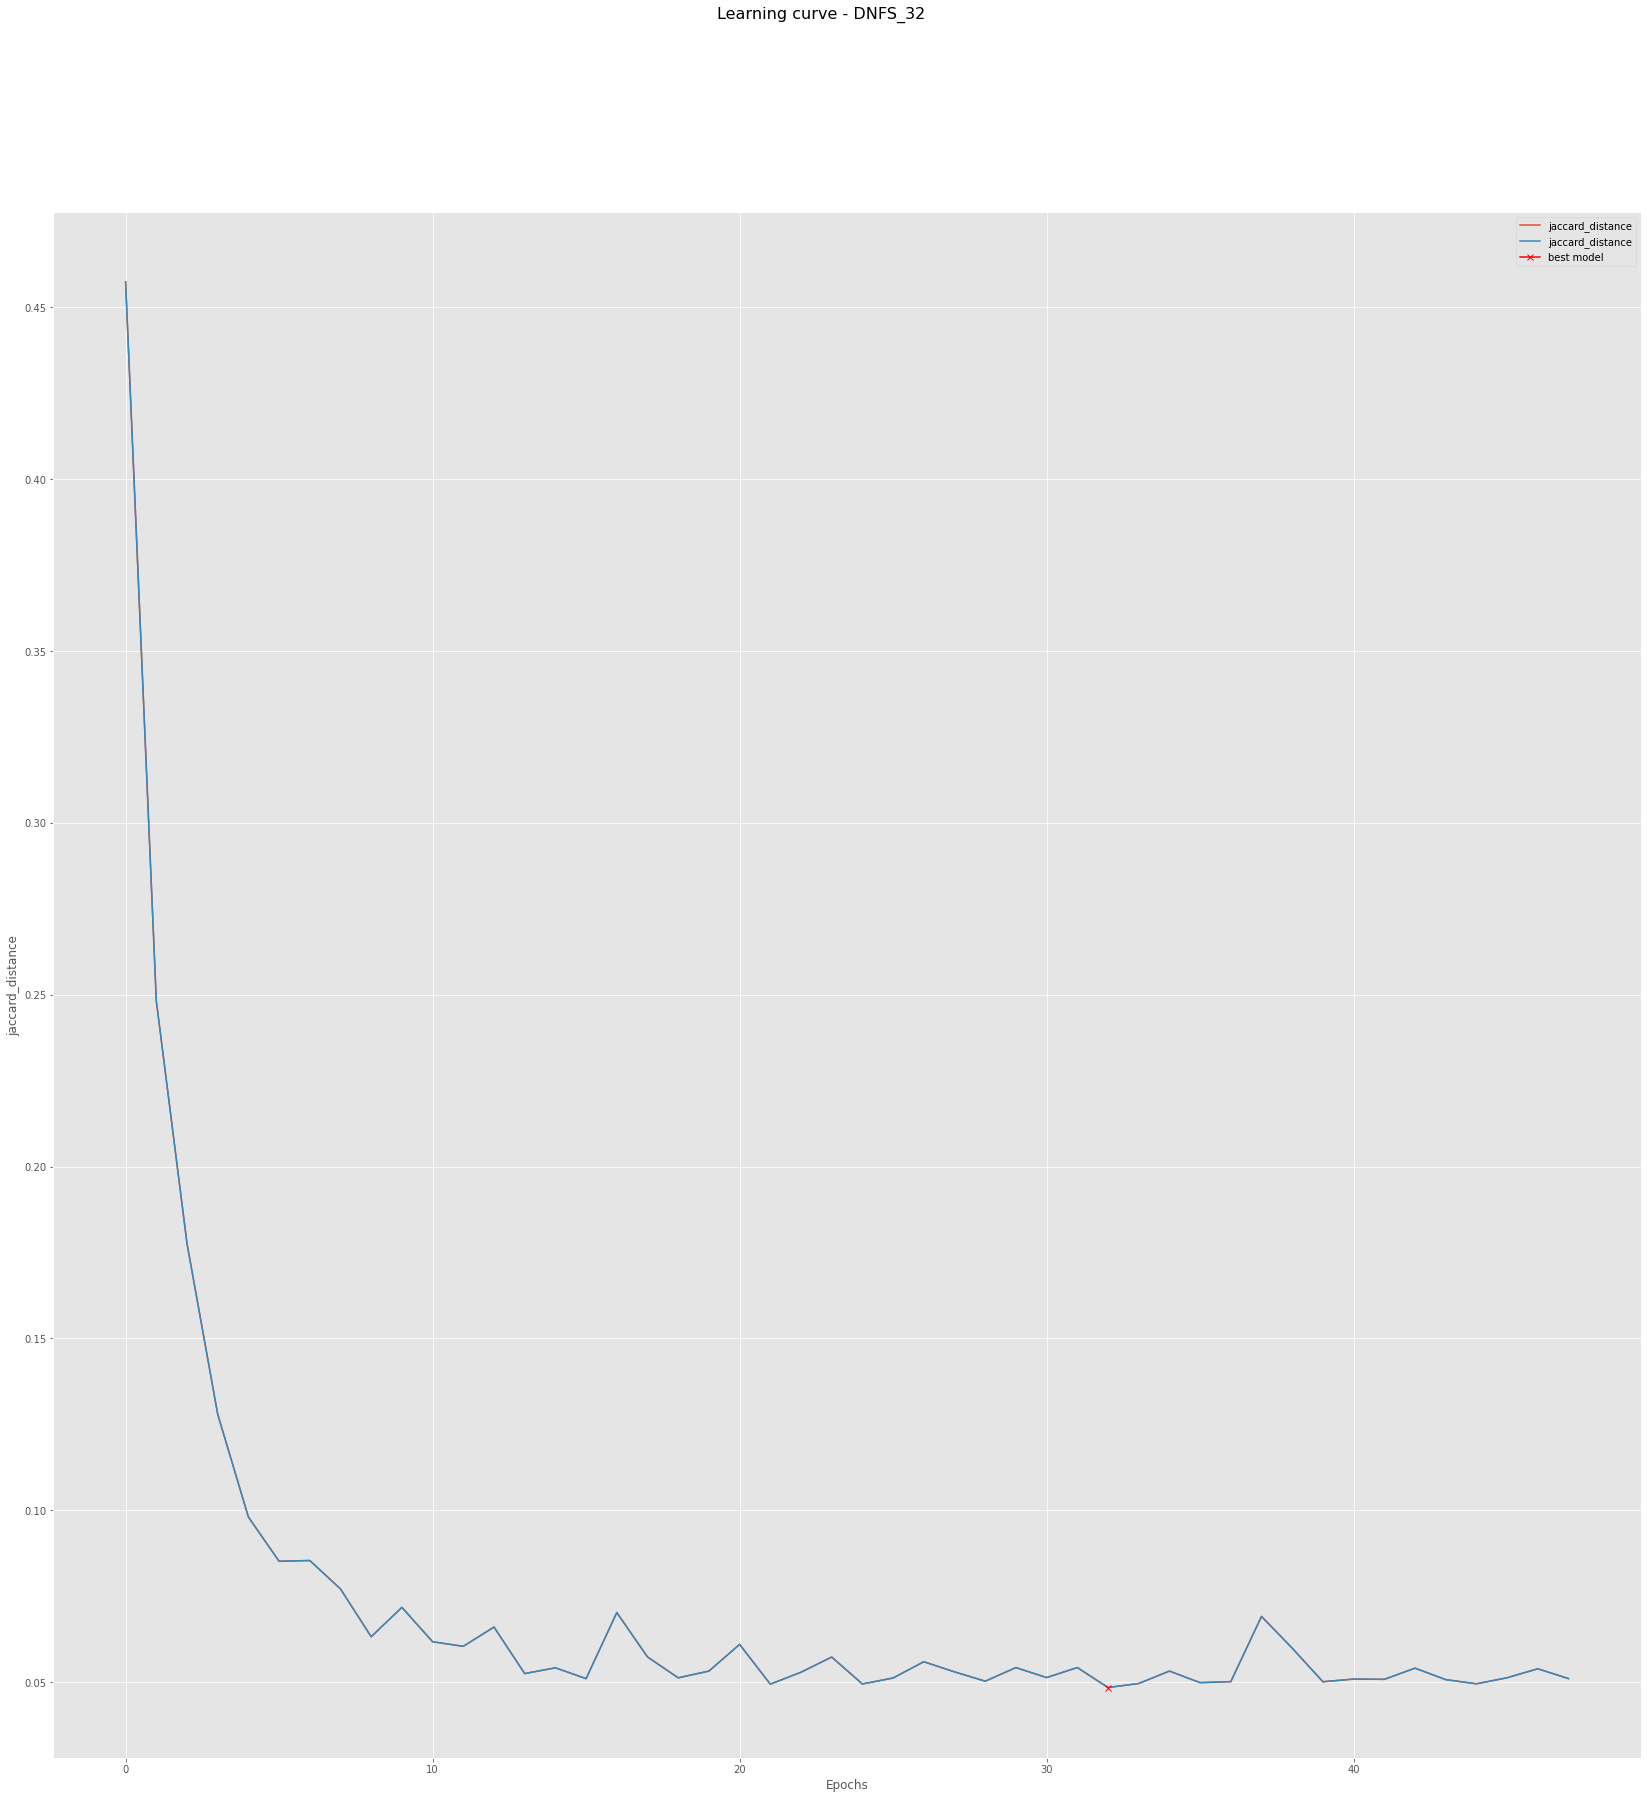

----------------------------------------
Plot de resultados do modelo DNFS_64


<Figure size 1440x864 with 0 Axes>

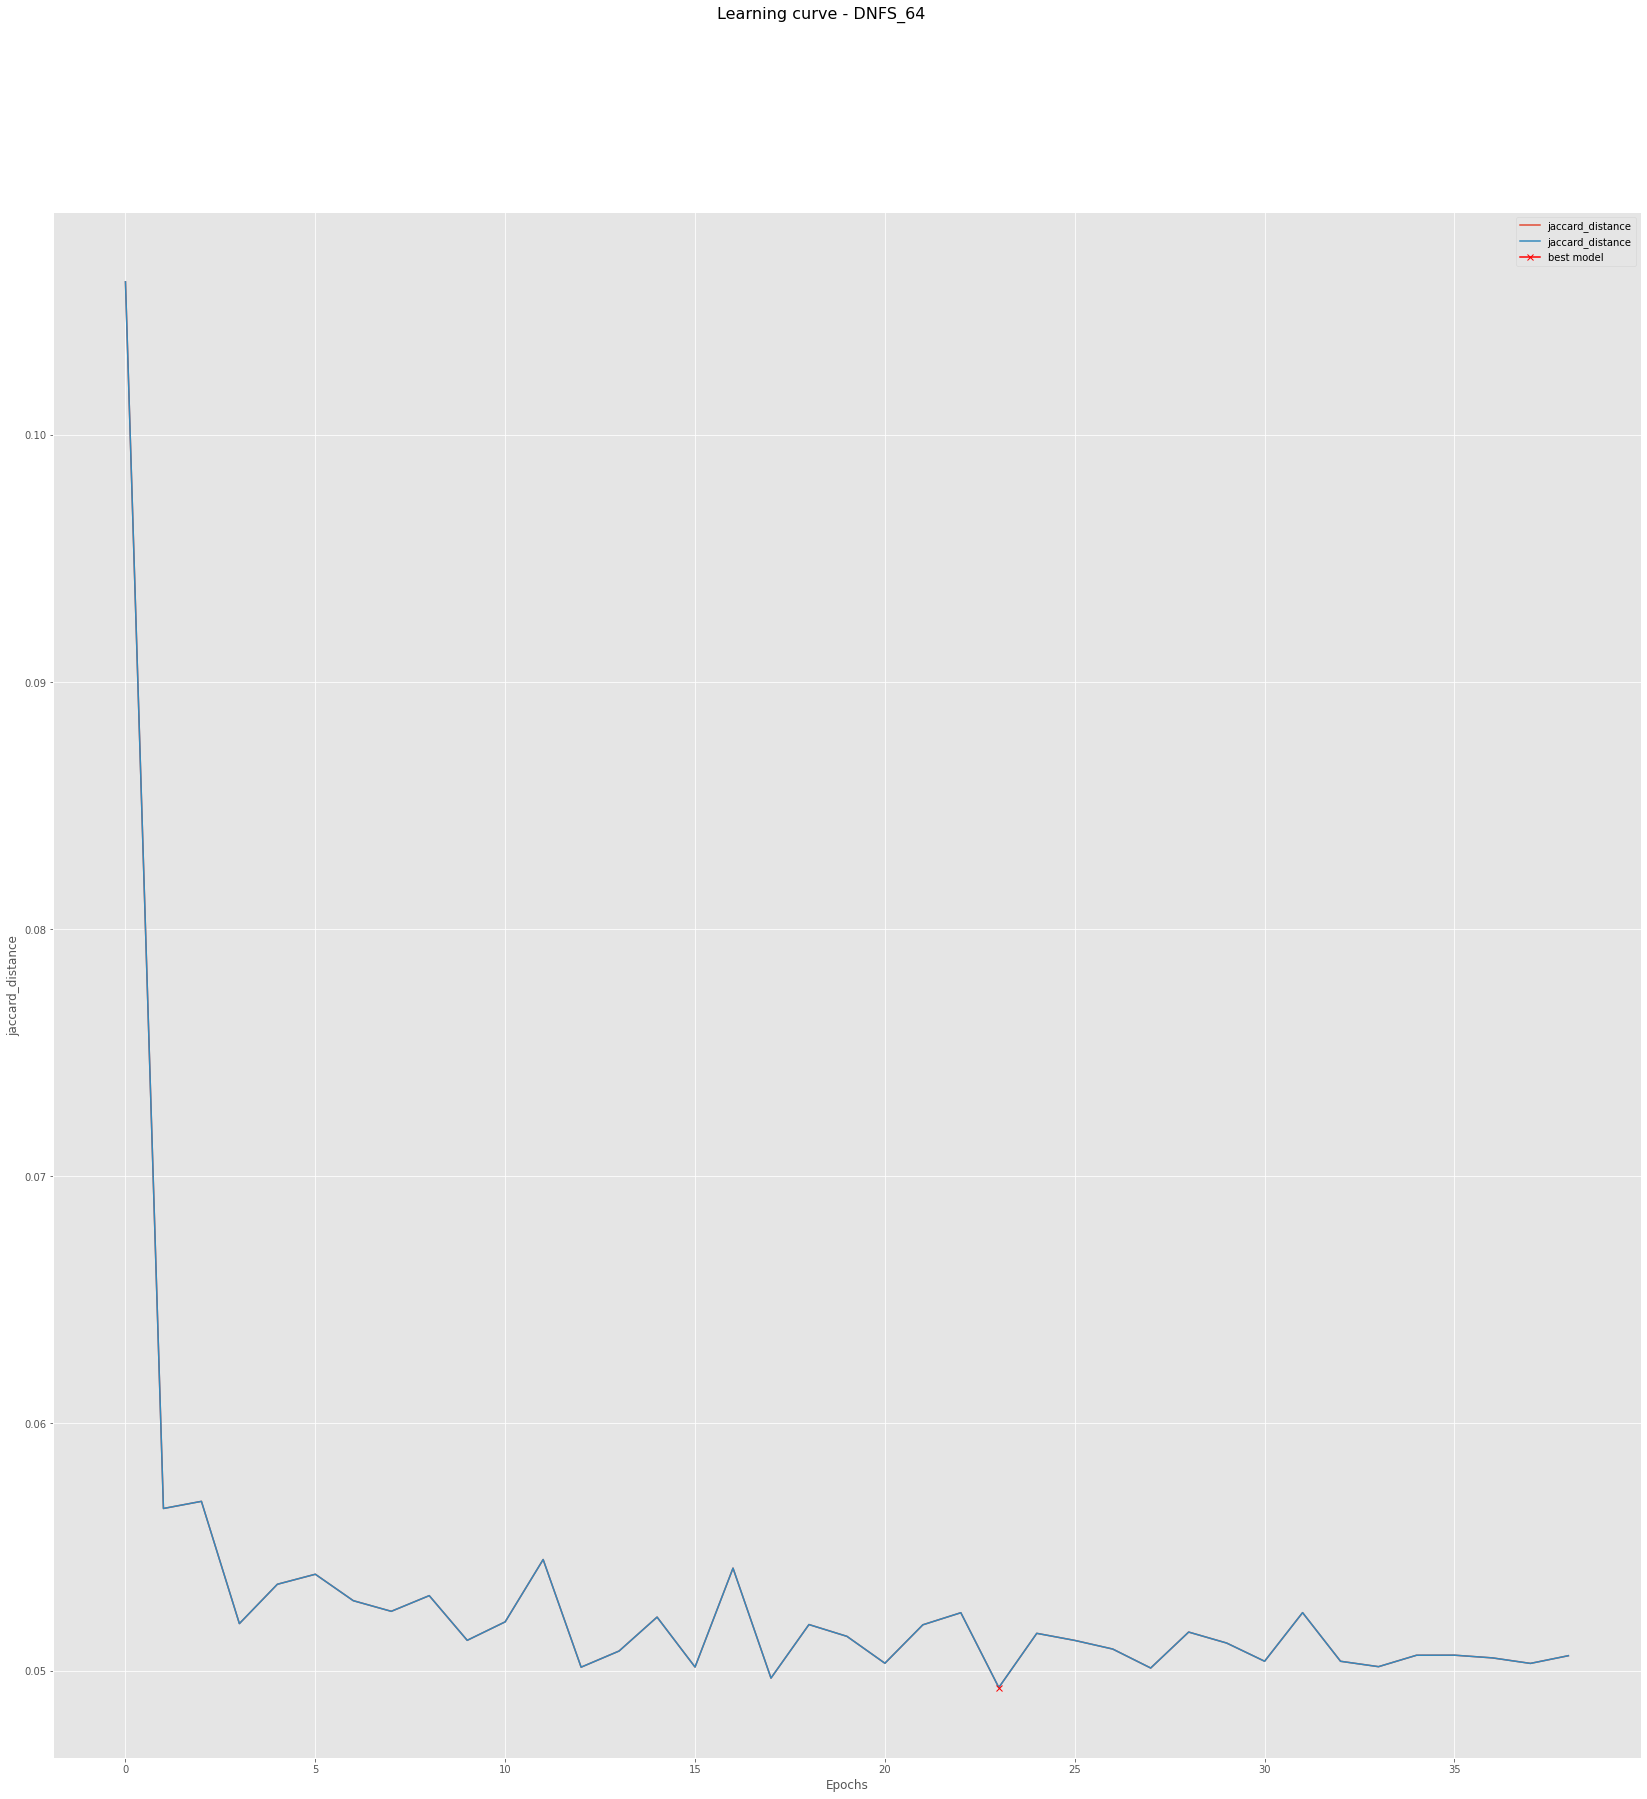

----------------------------------------
Plot de resultados do modelo StNet


<Figure size 1440x864 with 0 Axes>

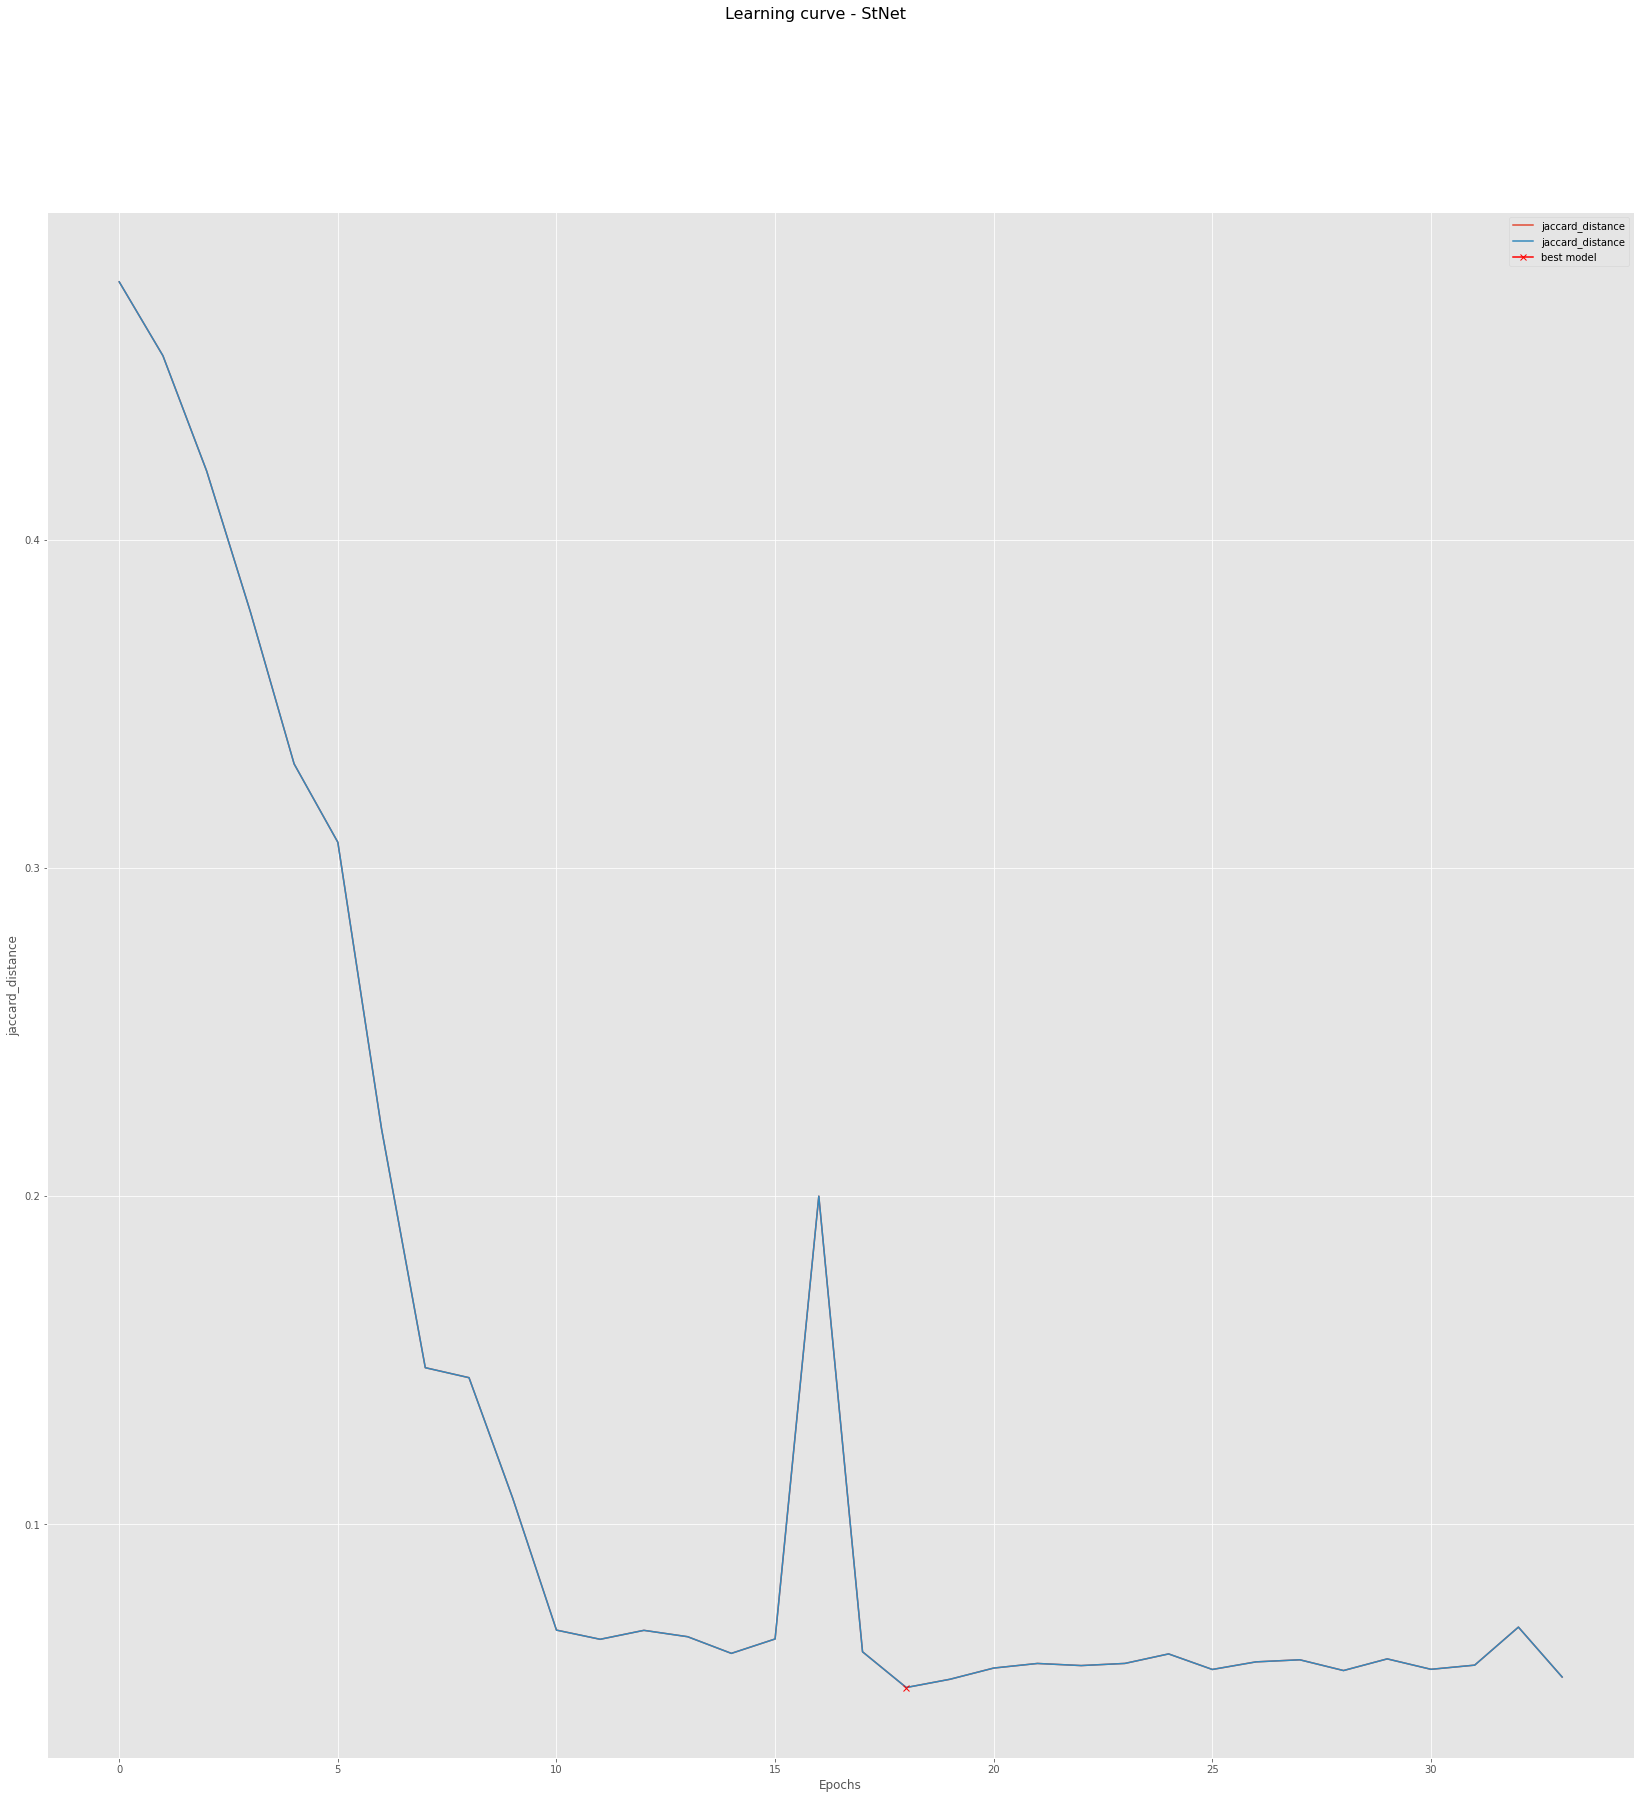

----------------------------------------
Plot de resultados do modelo Unet


<Figure size 1440x864 with 0 Axes>

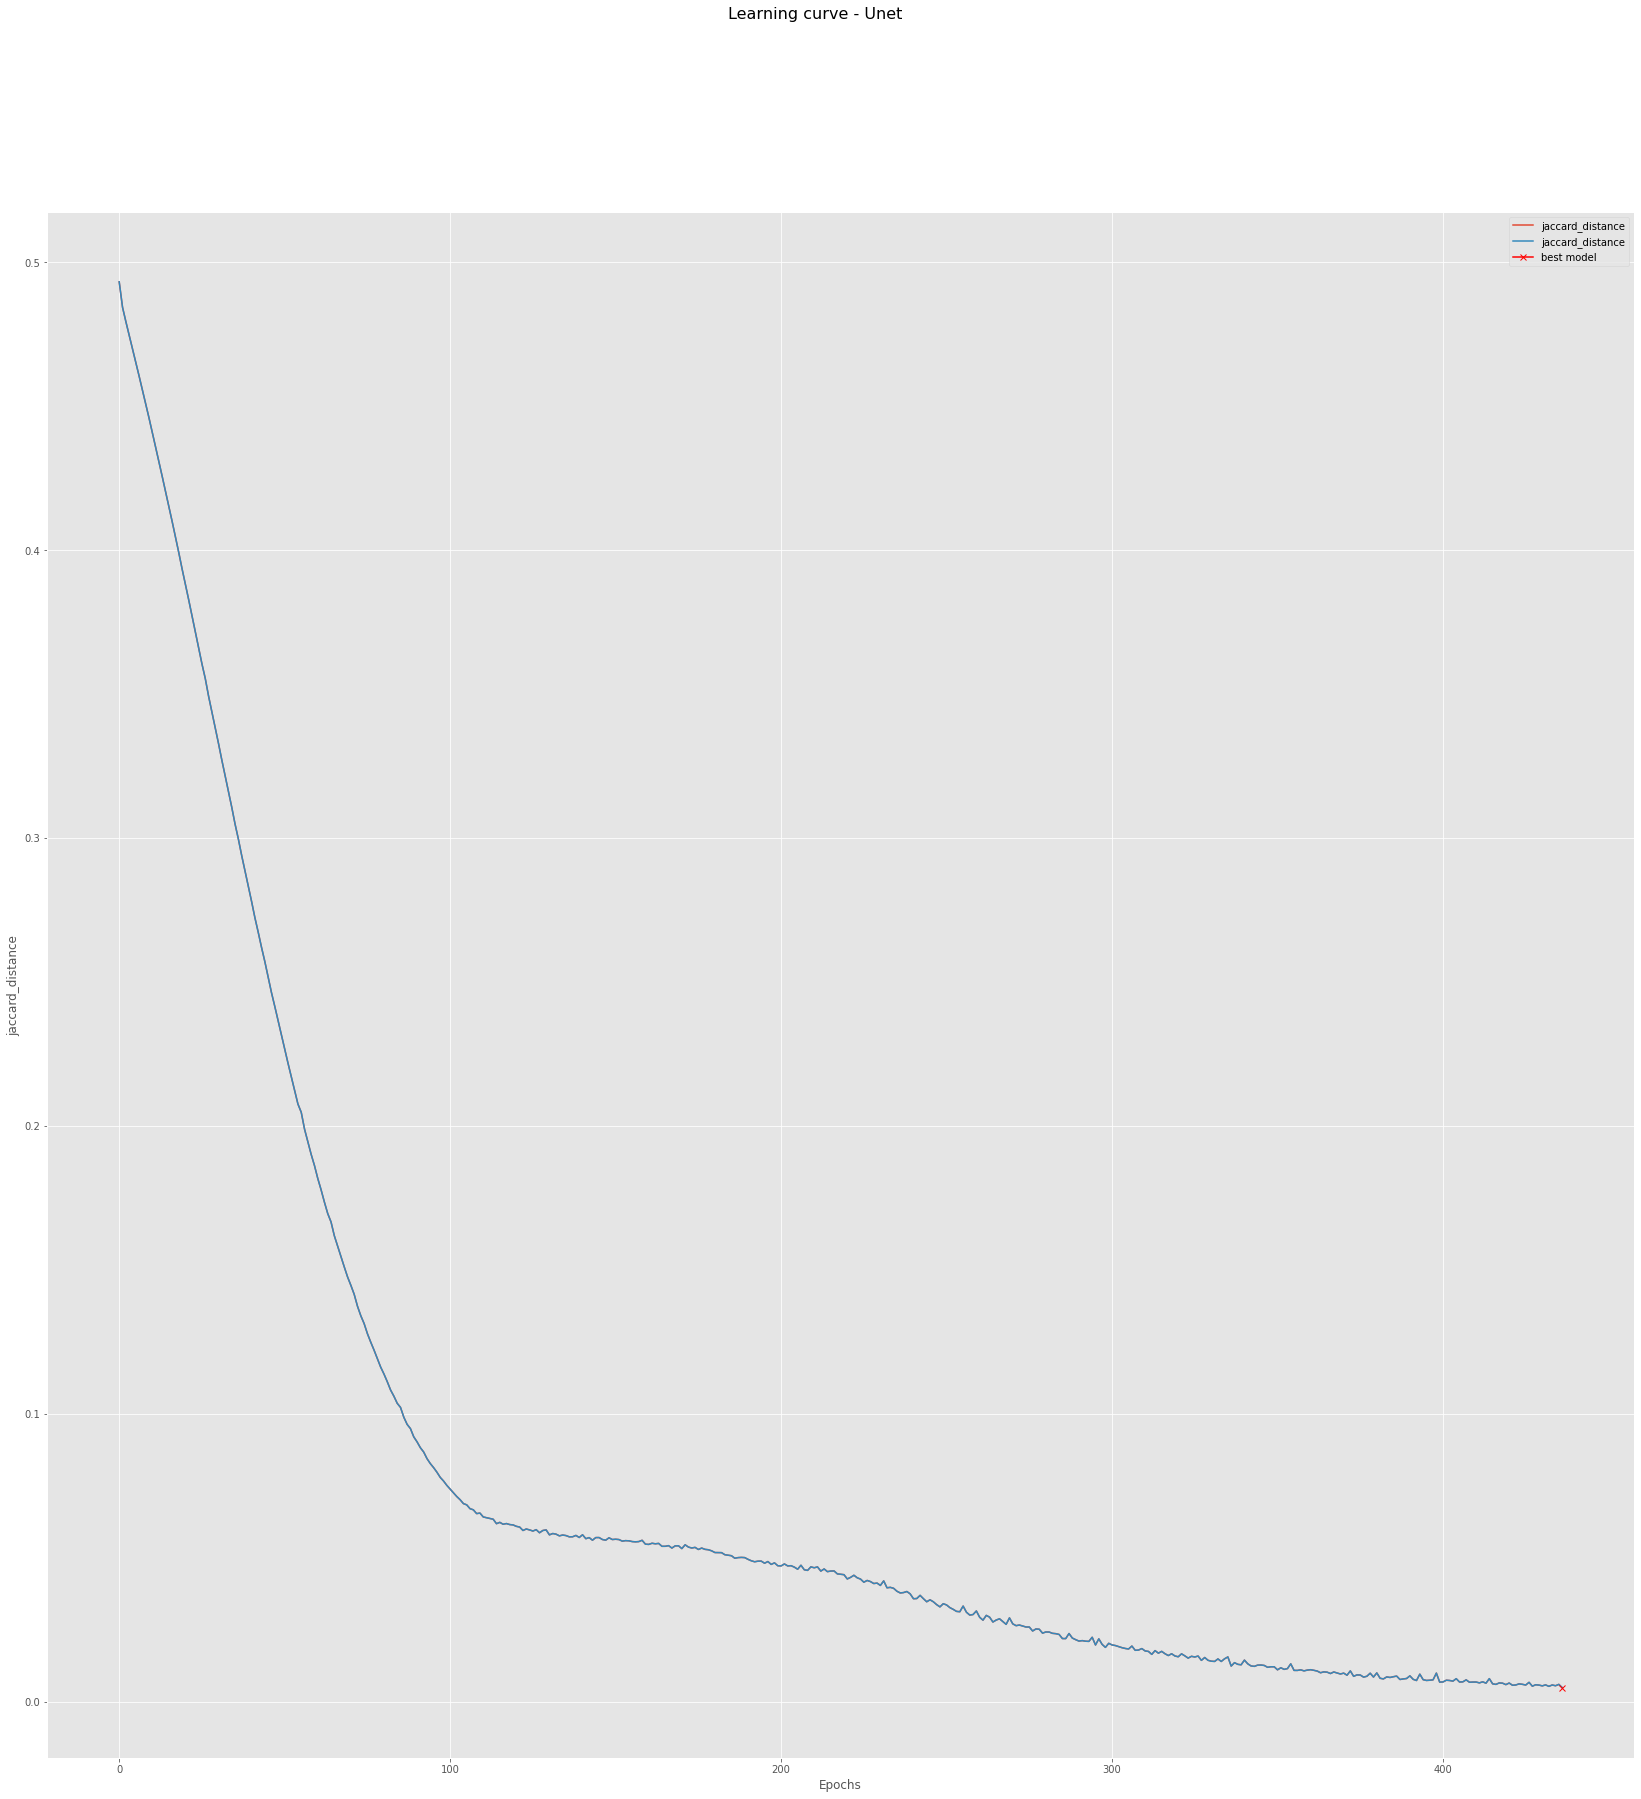

In [33]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/show_learning_curve.py').read_text()))
    

 **<h3>HISTÓRICO DE TREINAMENTO</h3>**

In [34]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/print_training_history.py').read_text()))

----------------------------------------
History dos resultados do modelo DNFS_4
loss : [0.9387526512145996, 0.7363354563713074, 0.6289464235305786, 0.5856652855873108, 0.5413894057273865, 0.5264825820922852, 0.5050012469291687, 0.47215166687965393, 0.4566551148891449, 0.4392184317111969, 0.42041683197021484, 0.4639562666416168, 0.43962445855140686, 0.41865274310112, 0.40983501076698303, 0.3929450809955597, 0.3846214711666107, 0.37344422936439514, 0.3694373667240143, 0.359689861536026, 0.3506282567977905, 0.35823383927345276, 0.35856565833091736, 0.3545360565185547, 0.3427411615848541, 0.34433984756469727, 0.33060574531555176, 0.31987816095352173, 0.3231894075870514, 0.3163202702999115, 0.31273168325424194, 0.3034176826477051, 0.29716116189956665, 0.2936844825744629, 0.2912572920322418, 0.28326430916786194, 0.27743980288505554, 0.2733330726623535, 0.27047255635261536, 0.2669330835342407, 0.2609945237636566, 0.2569575607776642, 0.25335201621055603, 0.2518737018108368, 0.2462662458419799

 **<h3>COPIA OS MODELOS PARA O GOOGLE DRIVE</h3>**

In [35]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/copy_model_to_google_drive.py').read_text()))

Arquivo model-DNFS_4_jac_0.25_cross_0.75.h5 copiado para //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/model-DNFS_4_jac_0.25_cross_0.75.h5
Arquivo model-DNFS_8_jac_0.25_cross_0.75.h5 copiado para //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/model-DNFS_8_jac_0.25_cross_0.75.h5
Arquivo model-DNFS_16_jac_0.25_cross_0.75.h5 copiado para //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/model-DNFS_16_jac_0.25_cross_0.75.h5
Arquivo model-DNFS_32_jac_0.25_cross_0.75.h5 copiado para //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/model-DNFS_32_jac_0.25_cross_0.75.h5
Arquivo model-DNFS_64_jac_0.25_cross_0.75.h5 copiado para //content/drive/MyDrive/dissertacao/Dissertacao_001-SeismicDataSet-jac_25_cross_75-DNFS_LR_0.001//hdf5_model/model-DNFS_64_jac_0.2

**<h1>TEST</h1>**

In [36]:
import sys
import textwrap 
from pathlib import Path

exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/metrics.py').read_text()))
exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/data.py').read_text()))
#exec(textwrap.dedent(Path('/content/drive/MyDrive/Trabalho/neural_network/colab_steps/models_test.py').read_text()))

/dataset//test/390
DNFS_4_390; Back-pixel DiceCoeff [correct, wrong](%): [0.00, 0.00]; DiceCoeff (%): 99.27
DNFS_8_390; Back-pixel DiceCoeff [correct, wrong](%): [51.55, 96.90]; DiceCoeff (%): 99.01
DNFS_16_390; Back-pixel DiceCoeff [correct, wrong](%): [0.18, 199.64]; DiceCoeff (%): 99.26
DNFS_32_390; Back-pixel DiceCoeff [correct, wrong](%): [0.10, 199.80]; DiceCoeff (%): 99.21
DNFS_64_390; Back-pixel DiceCoeff [correct, wrong](%): [0.00, 200.00]; DiceCoeff (%): 99.27
StNet_390; Back-pixel DiceCoeff [correct, wrong](%): [0.00, 0.00]; DiceCoeff (%): 99.27
Unet_390; Back-pixel DiceCoeff [correct, wrong](%): [62.69, 74.62]; DiceCoeff (%): 99.17


Processado 1 de 1

DiceCoeff para DNFS_4. BlackPixels [correct, wrong]: [0.0, 0.0]; AllPixels: 0.9927081905732902
DiceCoeff para DNFS_8. BlackPixels [correct, wrong]: [51.547967893999235, 96.90406421200153]; AllPixels: 0.9901314850519115
DiceCoeff para DNFS_16. BlackPixels [correct, wrong]: [0.18151957818307546, 199.63696084363386]; AllPixels: 

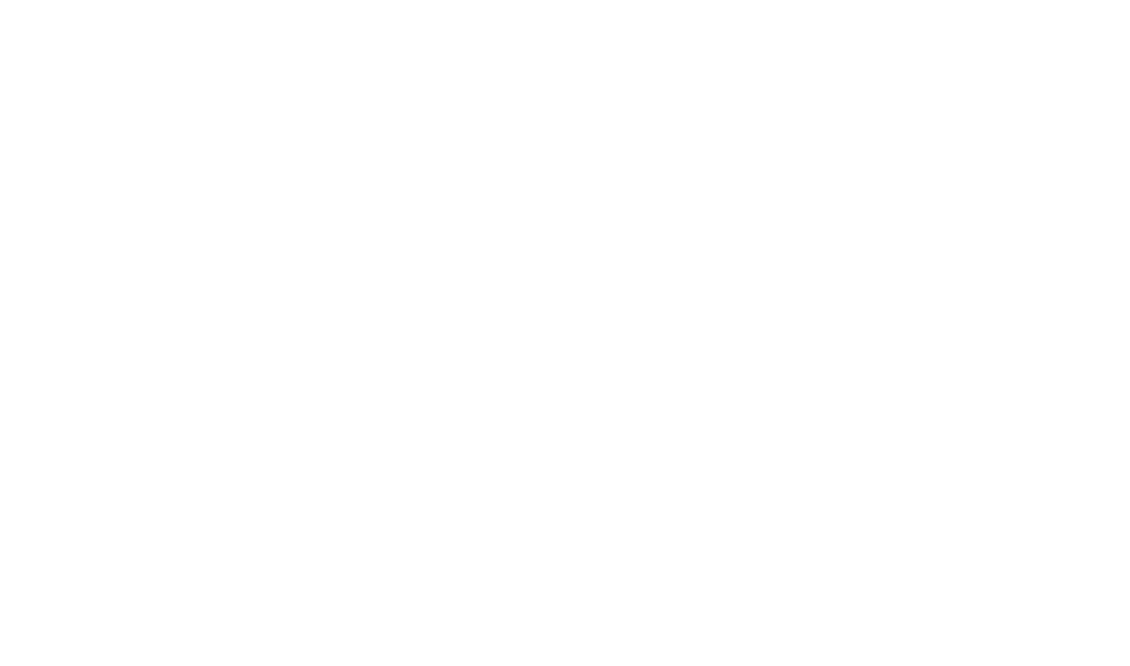

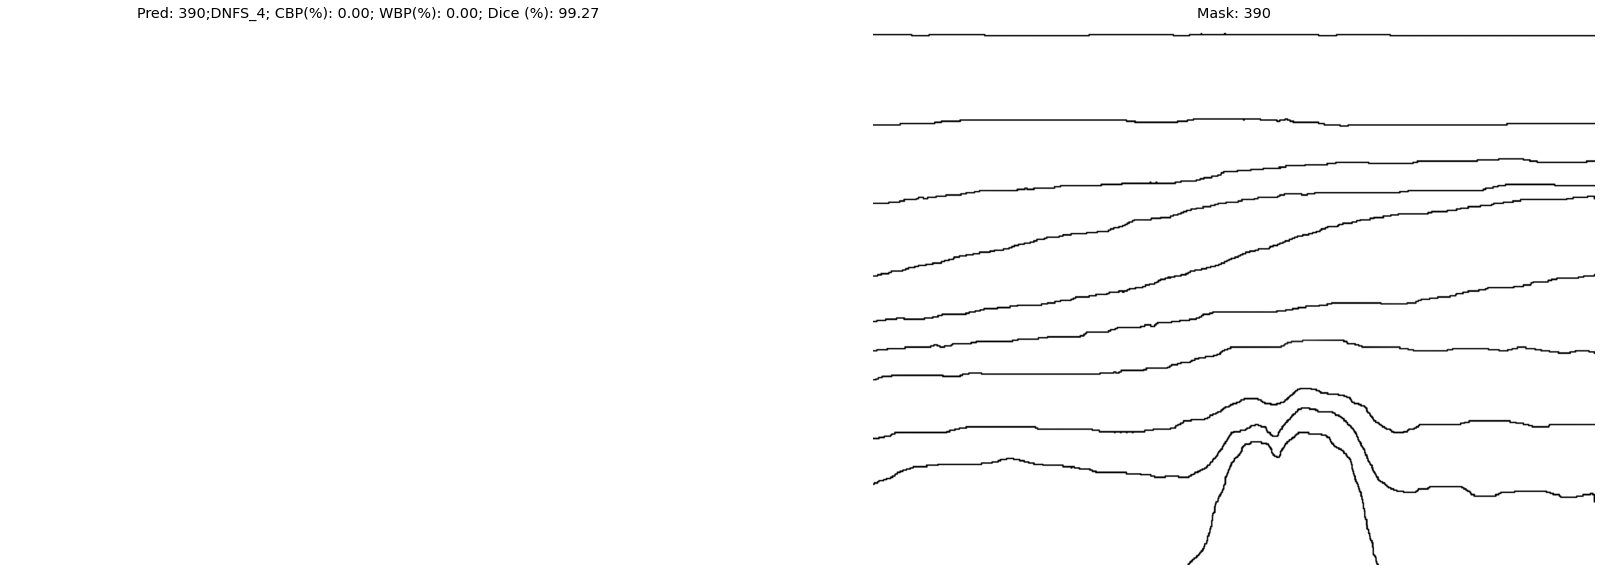

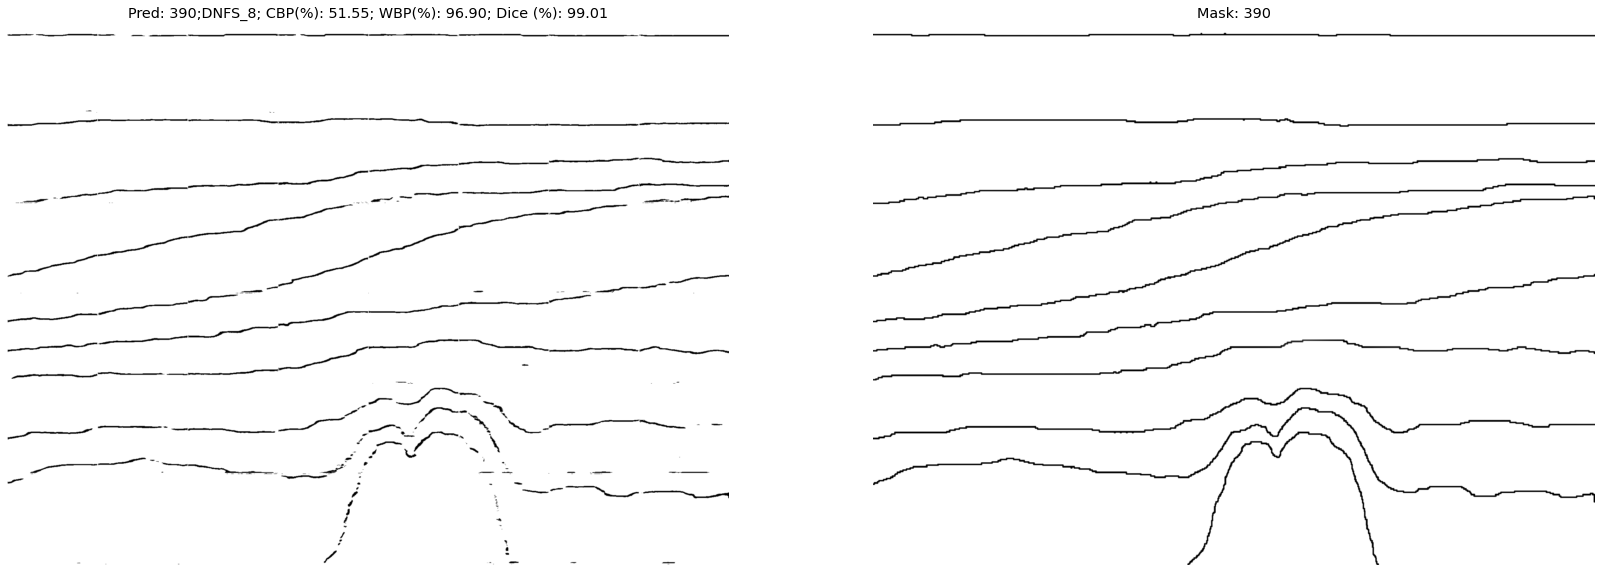

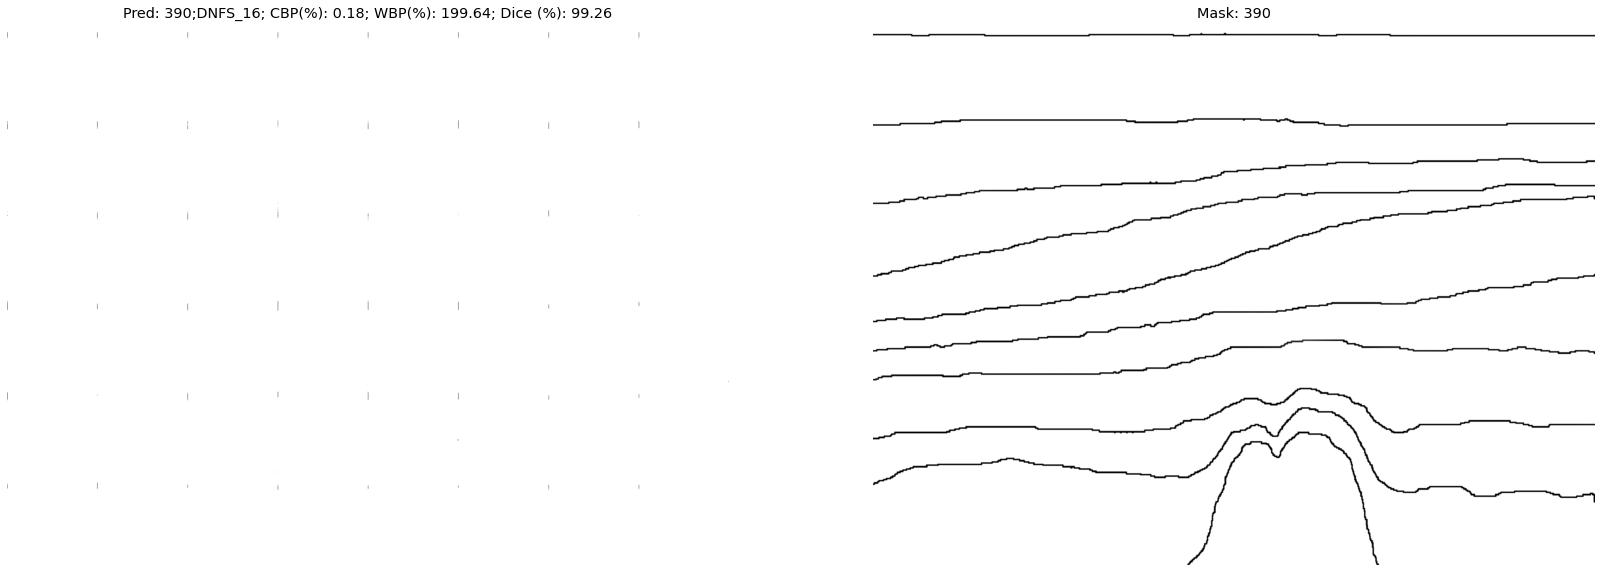

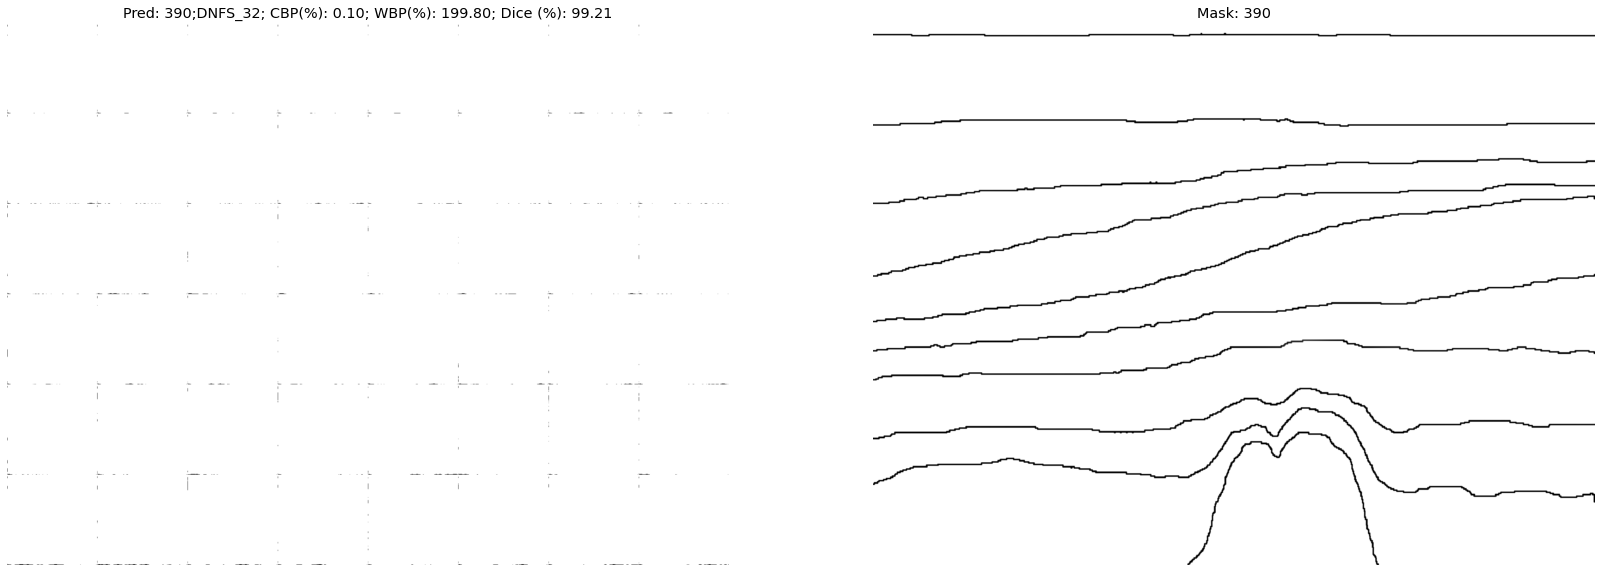

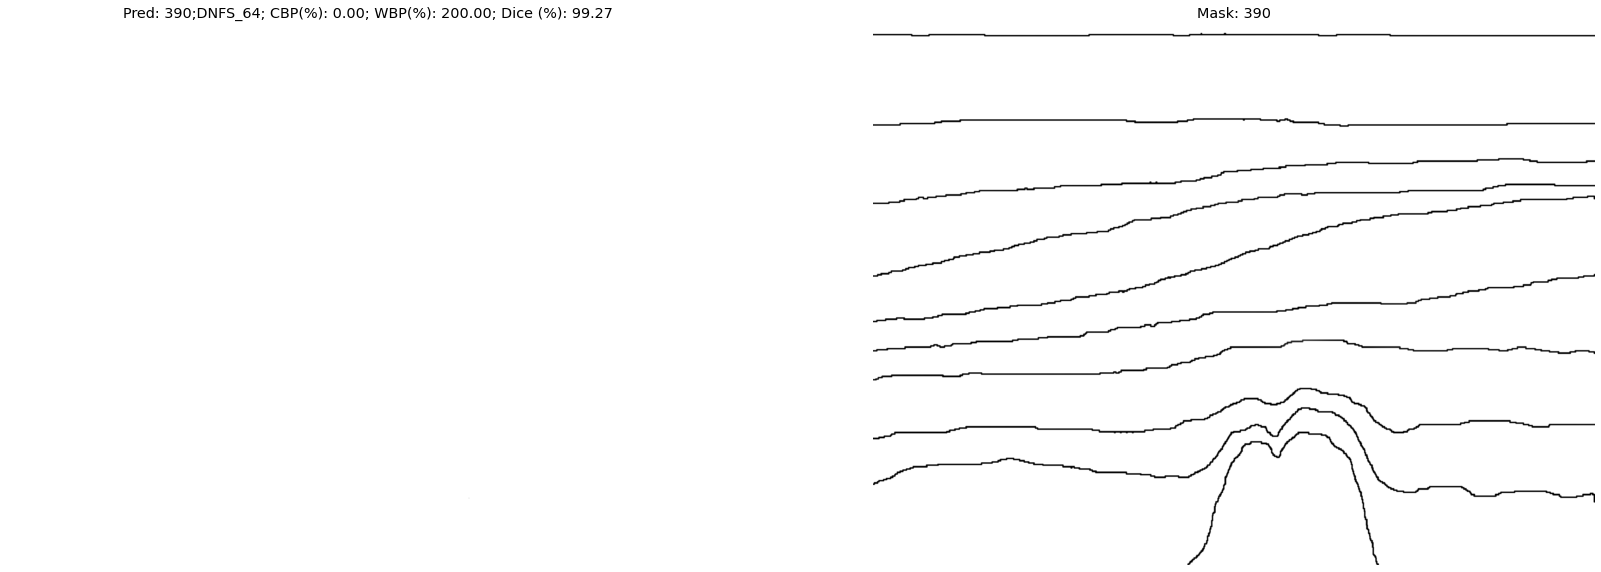

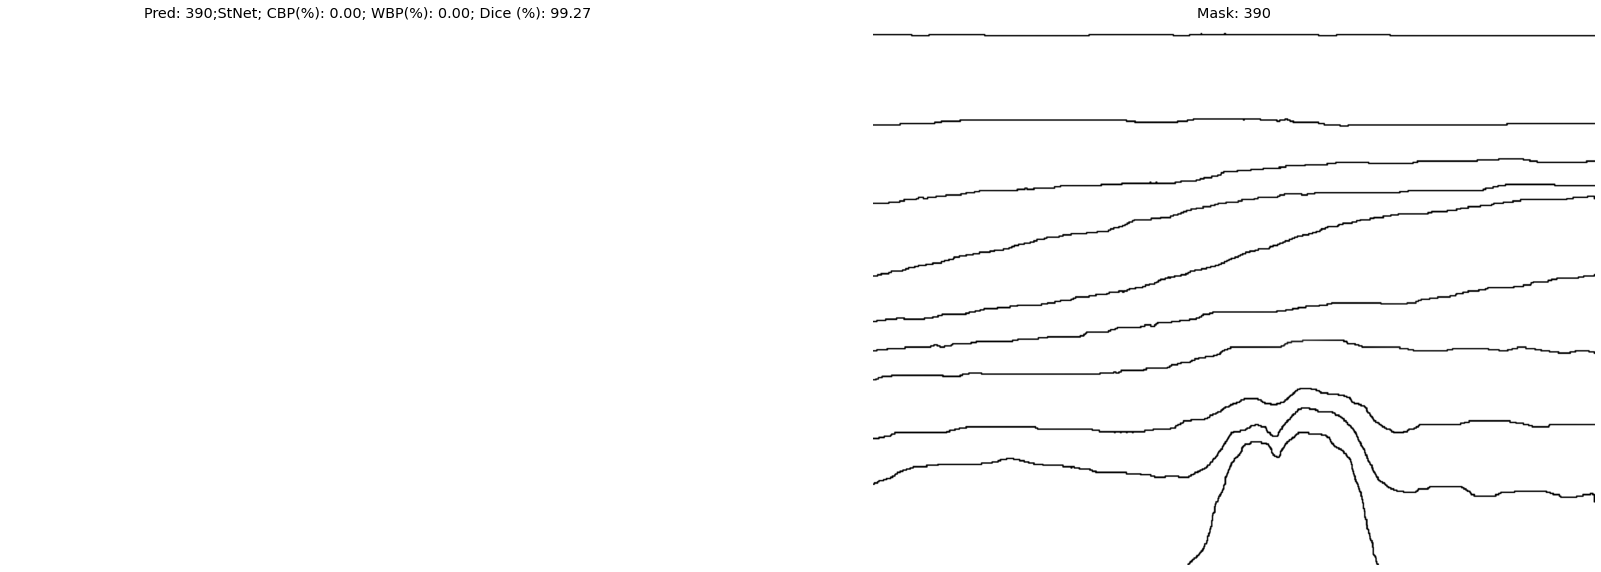

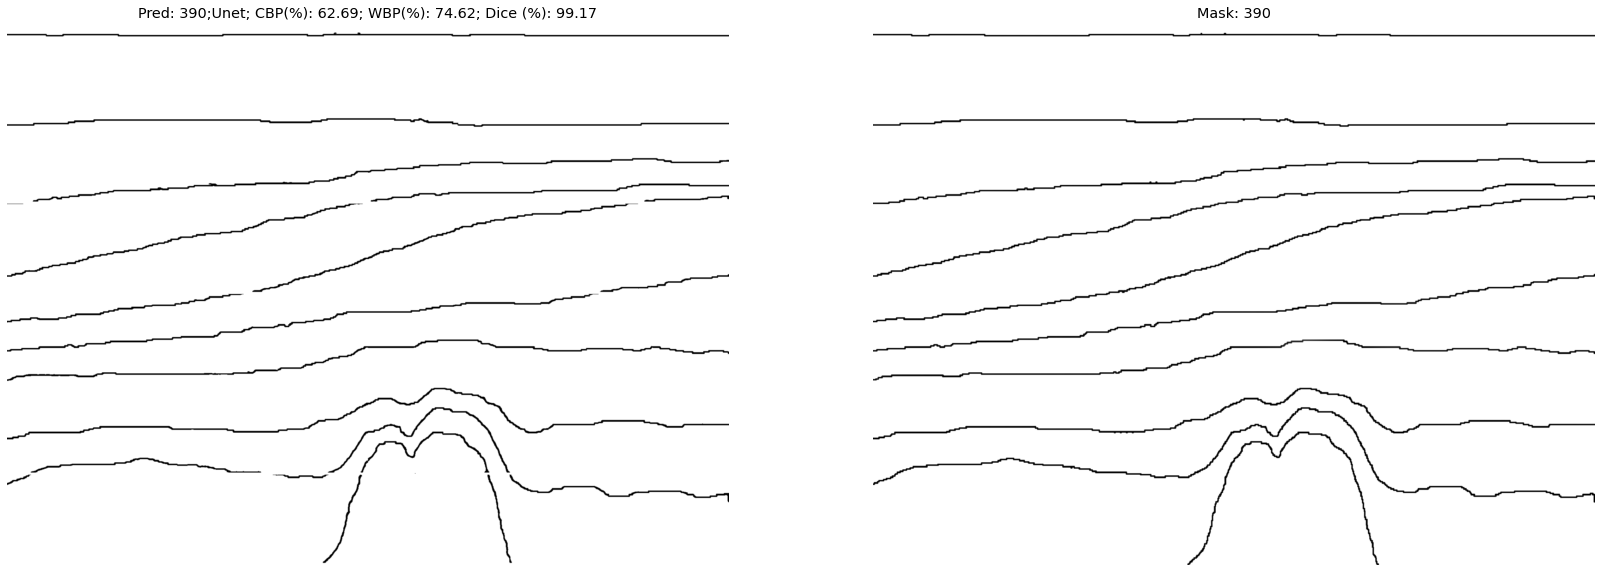

In [37]:
import glob
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import PIL

# %matplotlib inline
plt.style.use("ggplot")

"""# Get and resize train images and masks"""

import matplotlib.pyplot as plt

from PIL import Image
import gc

import matplotlib.pyplot as plt

plt.style.use("ggplot")
from PIL import Image, ImageOps

from tqdm import tqdm_notebook
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import img_to_array, load_img


def mount_pred_outpu_img_path(model_name, fig_name, black_pixels_percent):
    return f"{output_images_root_dir}/{fig_name}_{model_name}_jac_{jaccard_loss_percent}_cross_{1 - jaccard_loss_percent}_percent_{black_pixels_percent}.png"


for model_name in models.keys():
    model = models[model_name]
    assert model

    # Load best model
    model_hdf5_path = mount_hdf5_model_name(model_name, jaccard_loss_percent=jaccard_loss_percent)
    try:
        model.load_weights(model_hdf5_path)
    except:
        print(f"Erro ao carregar os dados do modelo {model_hdf5_path}")
        models[model_name] = None
        pass

directories = [f for f in glob.glob(os.path.join(path_test, "*"), recursive=True)]

# conta o número de imagens

column = -1
row = -1
real_images = {}

output_infos = {}

plt.rcParams['figure.figsize'] = {20, 12}
plt.axis('off')

# print("Diretorios", directories)
real_image_width = -1
real_image_height = -1
result = None
fig = None
ax = None
models_correct_black_pixel_dice_coeff_percent = {}
models_wrong_black_pixel_dice_coeff_percent = {}
models_dice_coeff_percent = {}
first = None
count_done = 0

for directory_ in directories:
    print(directory_)
    image_name_on_directory = os.path.split(directory_)
    image_name_on_directory = image_name_on_directory[1]

    for file in [f for f in glob.glob(os.path.join(directory_, "masks", "*.png"), recursive=True)]:
        image_name = os.path.split(file)
        image_name = image_name[1]
        image_name = str(image_name).replace(".png", "")
        row_and_column = image_name.split("_")
        row = max(int(row_and_column[0]), row)
        column = max(int(row_and_column[1]), column)

    img_path = os.path.join(directory_, 'real_image', image_name_on_directory + ".png")

    real_image = load_img(img_path, color_mode = "grayscale")
    real_image = img_to_array(real_image)

    real_image = np.reshape(real_image, (real_image.shape[0], real_image.shape[1]))
    # real_image = np.transpose(real_image, axes=(1,0))
    # real_images[directory_] = real_image

    real_image_width = max(real_image.shape[1], real_image_width)
    real_image_height = max(real_image.shape[0], real_image_height)

    # Número de imagens dentro da pasta vezes a quantidade de pastas
    number_of_ids = (row + 1) * (column + 1)
    assert number_of_ids != 0

    if real_image is None:
        print(f'Não há arquivos em {os.path.join(directory_, "images")}')
        assert False

    # shutil.rmtree("images", ignore_errors=True)
    figsize = (real_image_width / plt.gcf().dpi, real_image_height / plt.gcf().dpi)

    # converte a  imagem para escala de cinza
    # original_image = original_image.convert(mode="LA")
    original_image = real_image

    x_test, y_test, ids = get_data(directory_, image_width=image_width_width, image_height=image_width_height, train=True)

    for model_name in models.keys():
        model = models[model_name]
        if model is None:
            continue

        preds_test_t = []

        for i, x in enumerate(x_test):
            # Predict on train, val and test
            x = np.expand_dims(x, axis=0)
            pred_test = model.predict(x, verbose=0)

            # Threshold predictions
            pred_test_t = (pred_test > 0.5).astype(np.uint8)
            preds_test_t.append(pred_test_t)

            # big_image = np.ones((row, column, 256, 256))

        init_row = 0
        init_column = 0
        image_set = [[] for i in range(row + 1)]
        last_row = -1

        if result is None:
            result = Image.new("L", (real_image_width, real_image_height))

        for i, pred_test_t in enumerate(preds_test_t):

            image = pred_test_t.squeeze()

            id = ids[i]
            id = id.replace(".png", "")
            id = id.split("_")
            r = int(id[0])
            c = int(id[1])

            if last_row != r:
                last_row = r
                col_images = image_set[r]
            image = Image.fromarray(image)
            x = c * image_width_width
            y = r * image_width_height
            result.paste(image, (x, y, x + image_width_width, y + image_width_height))

        result = np.array(result)

        result_img_path = "/tmp/temp.png"
        result = np.array(result) * 255
        result = PIL.Image.fromarray(result)
        result = ImageOps.exif_transpose(result)
        result.save(result_img_path)

        predicted = Image.open(result_img_path)
        predicted = predicted.convert(mode="LA")
        predicted = ImageOps.exif_transpose(predicted)

        import cv2

        test = load_img(result_img_path, color_mode = "grayscale")
        test = img_to_array(test) / 255
        test = test.astype(np.int)

        # print("predicted size ", predicted.size)
        correct_black_pixel_dice_coeff = dice_coeff_for_correct_black_pixels(test, original_image)
        wrong_black_pixel_dice_coeff = dice_coeff_for_wrong_black_pixels(test, original_image)
        dice_coeff_percent = dice_coeff(test, original_image)

        str_correct_black_pixel_dice_coeff = "%.2f" % (correct_black_pixel_dice_coeff * 100)
        str_wrong_black_pixel_dice_coeff = "%.2f" % (wrong_black_pixel_dice_coeff * 100)
        str_dice_coeff_percent = "%.2f" % (dice_coeff_percent * 100)

        mask = Image.fromarray(real_image)
        # mask = PIL.ImageOps.invert(mask)
        mask = ImageOps.exif_transpose(mask)

        fig, ax = plt.subplots(1, 2, figsize=figsize)
        ax[0].set_axis_off()
        ax[0].grid(False)
        ax[1].grid(False)
        ax[1].set_axis_off()

        ax[0].imshow(predicted, cmap='Greys', interpolation='bilinear')
        ax[0].set_title(f'Pred: {image_name_on_directory};{model_name}; CBP(%): {str_correct_black_pixel_dice_coeff}; WBP(%): {str_wrong_black_pixel_dice_coeff}; Dice (%): {str_dice_coeff_percent}')

        ax[1].imshow(mask, cmap='Greys', interpolation='bilinear')
        ax[1].set_title(f'Mask: {image_name_on_directory}')

        if model_name in models_correct_black_pixel_dice_coeff_percent.keys():
            models_wrong_black_pixel_dice_coeff_percent[model_name].append(wrong_black_pixel_dice_coeff)
            models_correct_black_pixel_dice_coeff_percent[model_name].append(correct_black_pixel_dice_coeff)
            models_dice_coeff_percent[model_name].append(dice_coeff_percent)
        else:
            models_wrong_black_pixel_dice_coeff_percent[model_name] = [wrong_black_pixel_dice_coeff]
            models_correct_black_pixel_dice_coeff_percent[model_name] = [correct_black_pixel_dice_coeff]
            models_dice_coeff_percent[model_name] = [dice_coeff_percent]

        assert os.path.exists(result_img_path)
        shutil.copyfile(result_img_path, mount_pred_outpu_img_path(model_name, fig_name=image_name_on_directory, black_pixels_percent=correct_black_pixel_dice_coeff))
        image_name = os.path.split(file)[1]

        print(f"{model_name}_{image_name_on_directory}; Back-pixel DiceCoeff [correct, wrong](%): [{str_correct_black_pixel_dice_coeff}, {str_wrong_black_pixel_dice_coeff}]; DiceCoeff (%): {str_dice_coeff_percent}")
        plt.close('All')
    print()

    print()
    count_done = count_done + 1
    print(f"Processado {count_done} de {len(directories)}")
    print()

for model_name in models_correct_black_pixel_dice_coeff_percent.keys():
    values = models_correct_black_pixel_dice_coeff_percent[model_name]
    values = np.array(values)
    mean_cbp = values.mean()

    values = models_wrong_black_pixel_dice_coeff_percent[model_name]
    values = np.array(values)
    mean_wbp = values.mean()

    values = models_dice_coeff_percent[model_name]
    values = np.array(values)
    mean_all = values.mean()
    print(f"DiceCoeff para {model_name}. BlackPixels [correct, wrong]: [{mean_cbp * 100}, {mean_wbp * 100}]; AllPixels: {mean_all}")